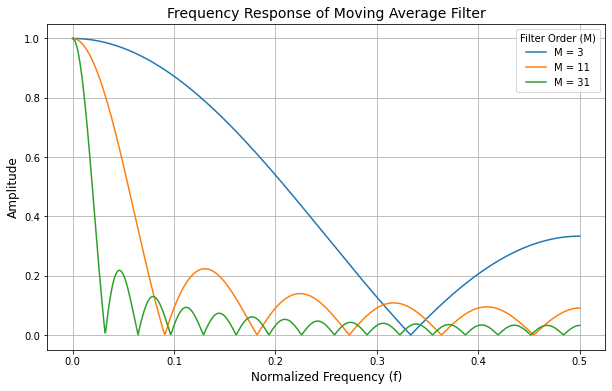

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung Moving Average dari sinyal
def moving_average(signal, M):
    N = len(signal)
    output = np.zeros(N - M + 1)
    for i in range(len(output)):
        output[i] = np.sum(signal[i:i+M]) / M
    return output

# Fungsi untuk menghitung respons frekuensi Moving Average Filter
def moving_average_frequency_response(M, f):
    numerator = np.sin(np.pi * f * M)
    denominator = M * np.sin(np.pi * f)
    response = np.divide(numerator, denominator, where=denominator!=0)  # Menghindari pembagian dengan 0
    response[0] = 1  # Pada frekuensi 0, respons harus 1
    return response

# Frekuensi dari 0 hingga 0.5 (normalisasi)
f = np.linspace(0, 0.5, 1000)

# Hitung respons frekuensi untuk berbagai nilai M
M_values = [3, 11, 31]
responses = [moving_average_frequency_response(M, f) for M in M_values]

# Plot hasil respons frekuensi
plt.figure(figsize=(10, 6))
for M, response in zip(M_values, responses):
    plt.plot(f, np.abs(response), label=f'M = {M}')

plt.title('Frequency Response of Moving Average Filter', fontsize=14)
plt.xlabel('Normalized Frequency (f)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.grid(True)
plt.legend(title='Filter Order (M)')
plt.show()
